In [117]:
# Import Dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Pull csv file
mental_health_csv = "../project-one/Resources/survey.csv"

# Read csv and create df
mental_health_data = pd.read_csv(mental_health_csv)
mental_health_df = pd.DataFrame(mental_health_data)
mental_health_df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [118]:
# Create a DataFrame for Pie Chart Variables and Rename Columns
tech_df = pd.DataFrame(mental_health_df, columns = ["tech_company", "treatment", "benefits", "obs_consequence"])
#Rename
tech_df.head()

,tech_company,treatment,benefits,obs_consequence
0,Yes,Yes,Yes,No
1,No,No,Don't know,No
2,Yes,No,No,No
3,Yes,Yes,No,Yes
4,Yes,No,Yes,No


In [119]:
# Fiter to only those working at a tech company
filter_tech=tech_df.loc[tech_df["tech_company"]=="Yes"]
filter_tech.head()

,tech_company,treatment,benefits,obs_consequence
0,Yes,Yes,Yes,No
2,Yes,No,No,No
3,Yes,Yes,No,Yes
4,Yes,No,Yes,No
5,Yes,No,Yes,No


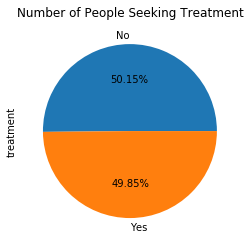

<Figure size 432x288 with 0 Axes>

In [120]:
# Create a plot showing number of people seeking treatmnent in tech
tech_treatment = filter_tech["treatment"].value_counts()
tech_treatment.plot(kind="pie", title="Number of People Seeking Treatment", autopct='%.2f%%')
plt.show()
plt.tight_layout()

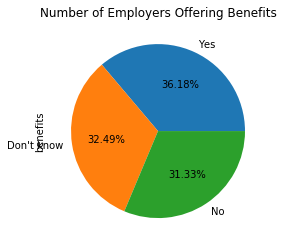

<Figure size 432x288 with 0 Axes>

In [121]:
# Create a plot showing number of employers offering benefits in tech
tech_benefits = filter_tech["benefits"].value_counts()
tech_benefits.plot(kind="pie", title="Number of Employers Offering Benefits", autopct='%.2f%%')
plt.show()
plt.tight_layout()

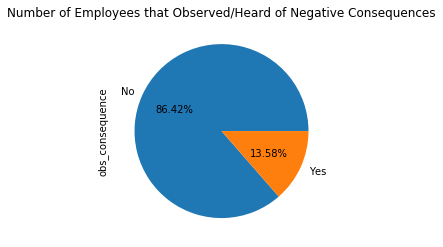

<Figure size 432x288 with 0 Axes>

In [122]:
# Create a plot showing number of people that observed/heard of negative consequences in tech
tech_consequences = filter_tech["obs_consequence"].value_counts()
tech_consequences.plot(kind="pie", title="Number of Employees that Observed/Heard of Negative Consequences", autopct='%.2f%%')
plt.show()
plt.tight_layout()

In [123]:
# Fiter to only those working at a non tech company
filter_tech_no=tech_df.loc[tech_df["tech_company"]=="No"]
filter_tech_no.head()

,tech_company,treatment,benefits,obs_consequence
1,No,No,Don't know,No
12,No,Yes,Yes,Yes
23,No,Yes,Don't know,No
25,No,Yes,Yes,No
58,No,No,No,No


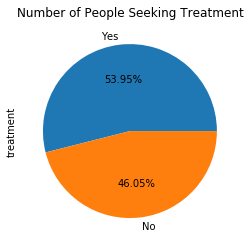

<Figure size 432x288 with 0 Axes>

In [124]:
# Create a plot showing number of people seeking treatmnent in a non tech job
no_tech_treatment = filter_tech_no["treatment"].value_counts()
no_tech_treatment.plot(kind="pie", title="Number of People Seeking Treatment", autopct='%.2f%%')
plt.show()
plt.tight_layout()

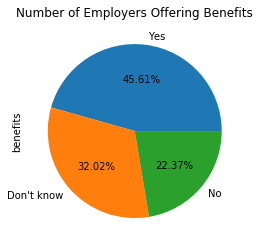

<Figure size 432x288 with 0 Axes>

In [125]:
# Create a plot showing number of employers offering benefits in a non tech job
no_tech_benefits = filter_tech_no["benefits"].value_counts()
no_tech_benefits.plot(kind="pie", title="Number of Employers Offering Benefits", autopct='%.2f%%')
plt.show()
plt.tight_layout()

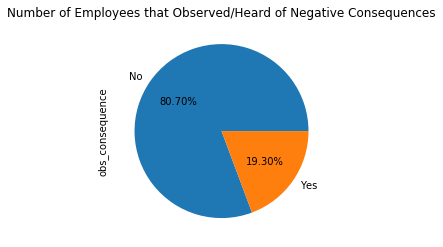

<Figure size 432x288 with 0 Axes>

In [126]:
# Create a plot showing number of people that observed/heard of negative consequences in a non tech job
no_tech_consequences = filter_tech_no["obs_consequence"].value_counts()
no_tech_consequences.plot(kind="pie", title="Number of Employees that Observed/Heard of Negative Consequences", autopct='%.2f%%')
plt.show()
plt.tight_layout()

(1251, 3)


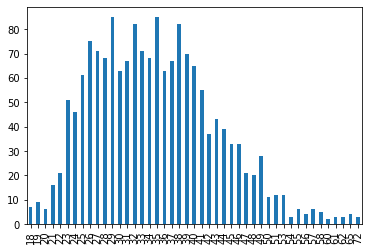

In [127]:
# Kayla and Saad's code for binning-- We can delete later. Just wanted to make sure my bar graphs worked with the bins
worker_output= pd.DataFrame(mental_health_df, columns=["Age","care_options", "treatment"])
worker_output
worker_output["Age"].value_counts().sort_index().plot(kind="bar")
worker_output=worker_output[(worker_output["Age"]>= 18) & (worker_output["Age"]<= 72)].copy()
print(worker_output.shape)
worker_output["Age"].value_counts().sort_index().plot(kind="bar")


In [134]:
# Kayla and Saad's code for binning-- We can delete later. Just wanted to make sure my bar graphs worked with the bins
bins = [0, 25, 30, 40, 72]
labels = ["Entry Level","Early/Mid Career","Mid Career", "Late Career"]
worker_output['Age Category'] = pd.cut(worker_output['Age'], bins=bins, labels=labels)
worker_output['Age Category'].value_counts()
worker_output

,Age,care_options,treatment,Age Category
0,37,Not sure,Yes,Mid Career
1,44,No,No,Late Career
2,32,No,No,Mid Career
3,31,Yes,Yes,Mid Career
4,31,No,No,Mid Career
...,...,...,...,...
1254,26,No,Yes,Early/Mid Career
1255,32,Yes,Yes,Mid Career
1256,34,Yes,Yes,Mid Career
1257,46,Yes,No,Late Career


In [148]:

treatments = worker_output["treatment"].value_counts()
age_by_treatment_df = pd.DataFrame(worker_output, columns=["Age Category", "treatments"])
age_by_treatment_df

,Age Category,treatments
0,Mid Career,NaN
1,Late Career,NaN
2,Mid Career,NaN
3,Mid Career,NaN
4,Mid Career,NaN
...,...,...
1254,Early/Mid Career,NaN
1255,Mid Career,NaN
1256,Mid Career,NaN
1257,Late Career,NaN


KeyError: 'Counts'